![alt text](images/HDAT9500Banner.PNG)
<br>

# Chapter 7 - Exercise 2: Autoencoders

# 1. Introduction

## 1.1. Aims:
1. Understand how to implement an autoencoder in TensorFlow
2. Understand the relationship between a linear autoencoder and PCA
 
## 1.2. Jupyter Notebook Intructions
1. Read the content of each cell.
2. Where necessary, follow the instructions that are written in each cell.
3. Run/Execute all the cells that contain Python code sequentially (one at a time), using the "Run" button.
4. For those cells in which you are asked to write some code, please write the Python code first and then execute/run the cell.

# 2. Dataset: Breast Cancer Wisconsin (Diagnostic) Data Set

## 2.1. Data Set Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. 
This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/ and the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

## 2.2. Attribute Information:

1. ID number
2. Diagnosis (M = malignant, B = benign)
3. to 32. Ten real-valued features are computed for each cell nucleus:

a. radius (mean of distances from center to points on the perimeter)
b. texture (standard deviation of gray-scale values)
c. perimeter
d. area
e. smoothness (local variation in radius lengths)
f. compactness (perimeter^2 / area - 1.0)
g. concavity (severity of concave portions of the contour)
h. concave points (number of concave portions of the contour)
i. symmetry
j. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

Further information can be found on:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

## 2.3. Import dataset

In [1]:
import numpy as np
import pandas as pd

Import the dataset and print it. Have a look at the dataset.

In [2]:
bcw = pd.read_csv('./data/breast-cancer-wisconsin-data/data.csv', sep=',')
print(bcw)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M       17.990         10.38          122.80     1001.0   
1      842517         M       20.570         17.77          132.90     1326.0   
2    84300903         M       19.690         21.25          130.00     1203.0   
3    84348301         M       11.420         20.38           77.58      386.1   
4    84358402         M       20.290         14.34          135.10     1297.0   
5      843786         M       12.450         15.70           82.57      477.1   
6      844359         M       18.250         19.98          119.60     1040.0   
7    84458202         M       13.710         20.83           90.20      577.9   
8      844981         M       13.000         21.82           87.50      519.8   
9    84501001         M       12.460         24.04           83.97      475.9   
10     845636         M       16.020         23.24          102.70      797.8   
11   84610002         M     

In [3]:
bcw.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


## 3. Autoencoders

## 3.1. Linear autoencoder vs. PCA

In [4]:
from sklearn import preprocessing

In [5]:
import tensorflow as tf

C:\Users\akrus\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
from sklearn.decomposition import PCA

In [7]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [8]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Select the first 10 numerical features in the dataset; these will be our feature vectors.

In [9]:
print(bcw.columns)
X = bcw[bcw.columns[2:12]]
X.describe()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


Scale data to have zero mean and unit variance.

In [10]:
X_scaled = preprocessing.scale(X)
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[-1.37363271e-16  6.86816353e-17 -1.24875700e-16 -2.18532476e-16
  1.74825981e-16  1.99801121e-16  3.74627101e-17 -3.74627101e-17
  1.87313551e-16  4.52674414e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Implement a linear autoencoder.

In [11]:
# Define computational graph and loss function
reset_graph()

n_inputs = 10 # How many features does the input data have?
n_hidden = 2  # Dimension of codings
n_outputs = n_inputs # What should be the dimension of the output?

learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden)
outputs = tf.layers.dense(hidden, n_outputs)

# MSE loss
reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)

init = tf.global_variables_initializer()

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
# Train for 1000 iterations
n_iterations = 1000
codings = hidden

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        training_op.run(feed_dict={X: X_scaled})
    codings_val = codings.eval(feed_dict={X: X_scaled})

Plot codings.

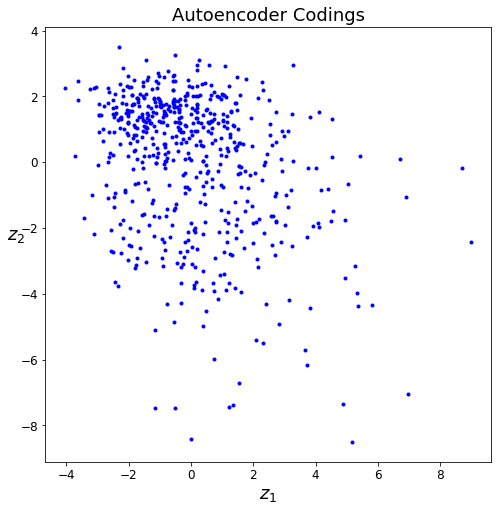

In [13]:
fig = plt.figure(figsize=(8,8))
plt.plot(codings_val[:,0], codings_val[:,1], "b.")
plt.title("Autoencoder Codings", fontsize=18)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.show()

Plot codings and label according to diagnosis.

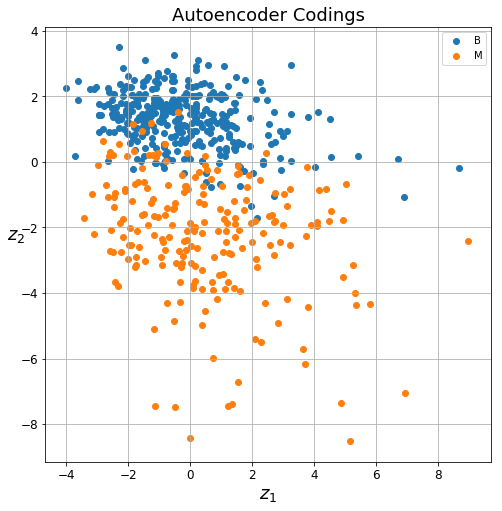

In [14]:
# Class labels
y = bcw.loc[:, 'diagnosis']
# Plot
fig, ax = plt.subplots(figsize=(8,8))
for g in np.unique(y):
    ix = np.where(y == g)
    ax.scatter(codings_val[ix,0], codings_val[ix,1], label = g)
plt.title("Autoencoder Codings", fontsize=18)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.legend(loc='best')
plt.grid()
plt.show()

Classic PCA, keep first two principal components.

In [15]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X_scaled)
print(X2D)

[[ 5.22415459  3.20442816]
 [ 1.72809379 -2.54083911]
 [ 3.96975705 -0.55007488]
 ...
 [ 0.64958328 -2.0417835 ]
 [ 6.90566407  1.21624274]
 [-3.97083348 -0.98997117]]


Plot principal components and label according to diagnosis.

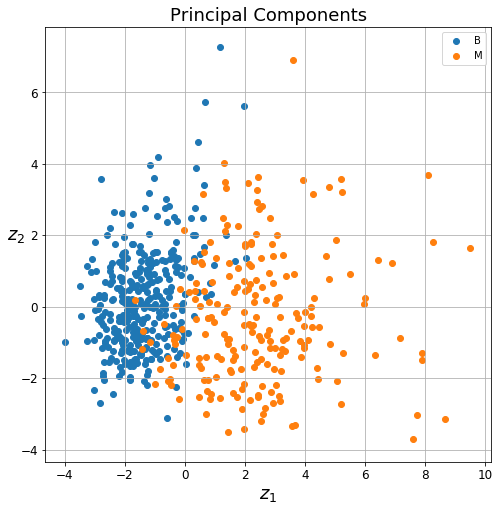

In [26]:
# Class labels
y = bcw.loc[:, 'diagnosis']
# Plot
fig, ax = plt.subplots(figsize=(8,8))
for g in np.unique(y):
    ix = np.where(y == g)
    ax.scatter(X2D[ix,0], X2D[ix, 1], label = g)
plt.title("Principal Components", fontsize=18)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.legend(loc='best')
plt.grid()
plt.show()

How do results differ between the linear autoencoder and PCA?

## Exercise
Tweak the codings plot (hint: flip signs and/or axes) so that it looks more similar to the principal components plot.

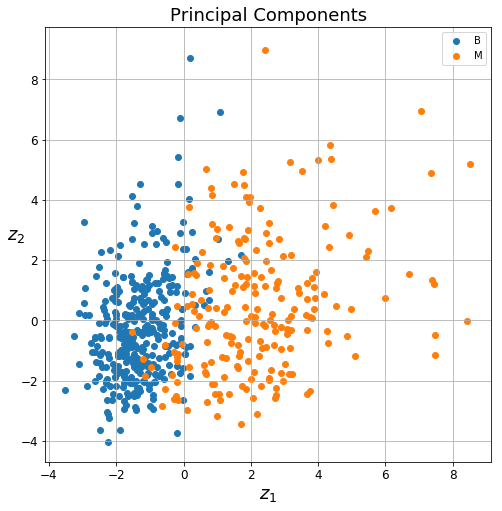

In [27]:
# Class labels
y = bcw.loc[:, 'diagnosis']
# Plot
fig, ax = plt.subplots(figsize=(8,8))
for g in np.unique(y):
    ix = np.where(y == g)
    ax.scatter( -codings_val[ix,1],codings_val[ix,0], label = g)
plt.title("Principal Components", fontsize=18)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.legend(loc='best')
plt.grid()
plt.show()

## 3.2. Stacked Autoencoders (Optional)

Let's build a stacked Autoencoder with 3 hidden layers and 1 output layer (ie. 2 stacked Autoencoders). We will use ELU activation, He initialization and L2 regularization.

In [28]:
reset_graph()

from functools import partial

# Define computational graph and loss function

n_inputs = 10
n_hidden1 = 5
n_hidden2 = 2  # codings
n_hidden3 = n_hidden1
n_outputs = n_inputs

learning_rate = 0.01
l2_reg = 0.0001

X = tf.placeholder(tf.float32, shape=[None, n_inputs])

he_init = tf.contrib.layers.variance_scaling_initializer() # He initialization
l2_regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
my_dense_layer = partial(tf.layers.dense,
                         activation=tf.nn.elu,
                         kernel_initializer=he_init,
                         kernel_regularizer=l2_regularizer)

hidden1 = my_dense_layer(X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3 = my_dense_layer(hidden2, n_hidden3)
outputs = my_dense_layer(hidden3, n_outputs, activation=None)

# MSE loss
reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))

reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
loss = tf.add_n([reconstruction_loss] + reg_losses)

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [29]:
# Train for 1000 iterations
n_iterations = 1000
codings = hidden2

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        training_op.run(feed_dict={X: X_scaled})
    codings_val = codings.eval(feed_dict={X: X_scaled})

Plot codings.

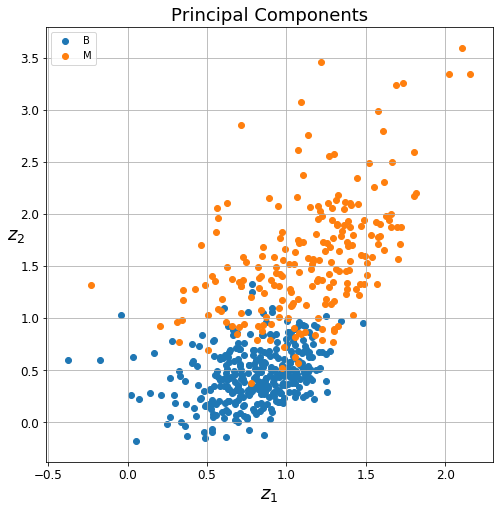

In [30]:
# Class labels
y = bcw.loc[:, 'diagnosis']
# Plot
fig, ax = plt.subplots(figsize=(8,8))
for g in np.unique(y):
    ix = np.where(y == g)
    ax.scatter(codings_val[ix,0], codings_val[ix, 1], label = g)
plt.title("Principal Components", fontsize=18)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.legend(loc='best')
plt.grid()
plt.show()